<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Regresi%C3%B3n_M%C3%BAltiple_y_Evaluaci%C3%B3n_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Regresión Múltiple



Los modelos de regresión multiple son aquellos que intentan encontrar una ecuación de tipo:

$$y= f(X),$$

y pueden ser de tipo polinómico y de tipo simple, pero con múltiples variables. En este caso $x$ podría ser un conjunto de variables predictoras o una sola variable que será sometida a un proceso polinómico.

## Regresión Lineal Polinómica


Tiene la forma:

$$y = w_0 + w_1x + w_2x^2 + \ldots + x_p^p$$

In [ ]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#En este caso trabajaremos con un toyset (un dataset generado)
X= np.linspace(-1,1,1000) #un vector desde -1 hasta 1 con 1000 puntos

#Agregamos ruido aleatorio
ruido = np.random.normal(0, 0.333,1000) #ruido aleatorio con distribución normal
#con media 0, desviación 0.333 y de 1000 puntos

#Generamos la variable dependiente
y = np.sin(4*X) + np.cos(3*X) + ruido

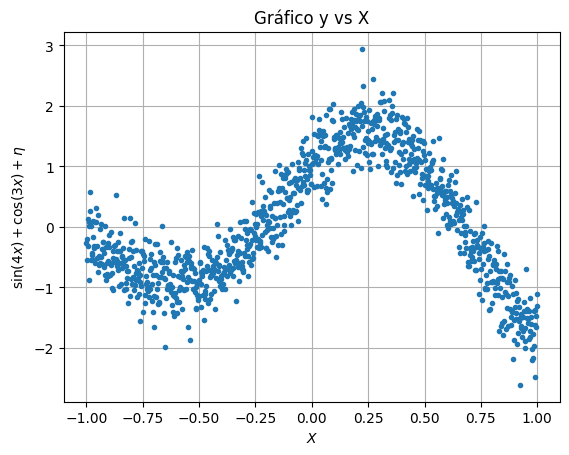

In [ ]:
#Graficamos los datos para efectos de visualizar
plt.plot(X,y,'.')
plt.grid()
plt.title('Gráfico y vs X')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [ ]:
#Haremos el modelo más sencillo que será un polinomio de grado 1
model = LinearRegression(fit_intercept=True) #Instanciamos el modelo
X = X.reshape(-1,1) #organizamos los datos
model.fit(X,y) #Entrenamos el modelo

LinearRegression()

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X,y) #El modelo es muy malo

0.03845263851587366

In [ ]:
#Evidenmente el modelo es malísimo, vamos a graficar el resultado
plt.plot(X,y,'.')
plt.plot(X,model.predict(X), 'r')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [ ]:
#Vamos a agregar una nueva característica con el fin de agregar un grado más al modelo (Polinomio de grado 2)
poly= PolynomialFeatures(degree=2, include_bias=True)
X_p = poly.fit_transform(X)

#Vamos a revisar el tamañp de X_p
X_p.shape

(1000, 3)

In [ ]:
#Entrenamos el modelo
model.fit(X_p,y)

#Calculamos el score
model.score(X_p,y)

0.45995453455613167

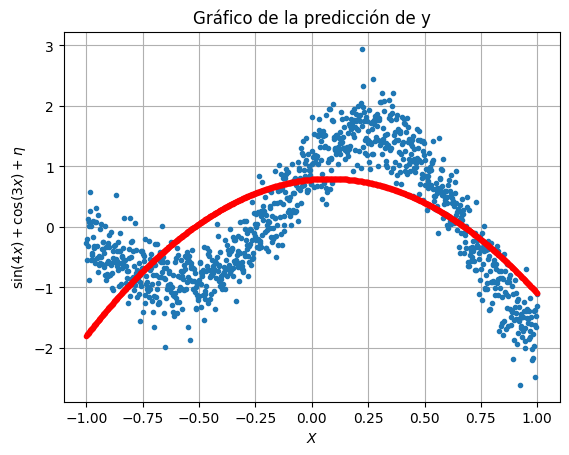

In [ ]:
#El modelo sique teniendo un mal ajuste, vamos a graficar el resultado
plt.plot(X,y,'.')
plt.plot(X,model.predict(X_p), 'r.')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [ ]:
#Aumentaremos un grado más para revisar los ajustes
poly= PolynomialFeatures(degree=3, include_bias=True)
X_p = poly.fit_transform(X)

#Entrenamos el modelo
model.fit(X_p,y)

#Calculamos el score
model.score(X_p,y)

0.8322637738558234

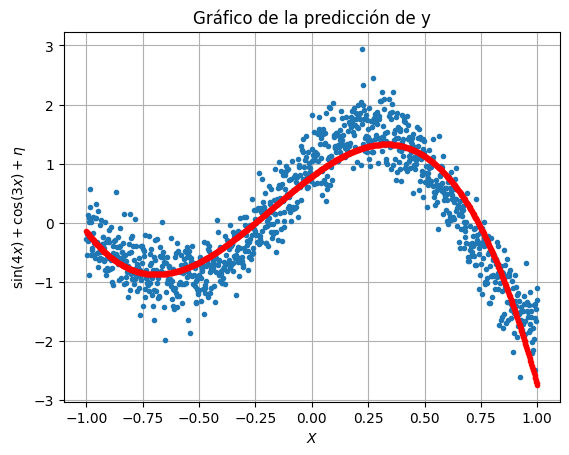

In [ ]:
#Graficamos para revisar el ajuste de los datos
plt.plot(X,y,'.')
plt.plot(X,model.predict(X_p), 'r.')
plt.grid()
plt.title('Gráfico de la predicción de y')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

Pareciera que mientras má alto el grado, el modelo mejor predice. Vamos a probarlo

*Secuencial Pipeline: Aplicamos secuencia procesos

In [ ]:
#Cargamosla libreria para la creación de pipelines

from sklearn.pipeline import Pipeline

#Instanciamos la secuncia de procesos que queremos aplicar a los datos
#Para el pipeline se crea una lista de tuplas, cada tupla está conformada por la pareja ('variable',función)

pipe= Pipeline([('poly', PolynomialFeatures()),
                ('model', LinearRegression(fit_intercept=True))])

#Creamos un vector con todos los grados del polinomio que queremos probar
degrees = range(2,16)

#Vamos a crear una lista vacia para almacenar los score queresulten de evaluar las regeresiones polinomiales con cada uno de los grados
scores = []

#Implementamos el ciclo que recorra TODOS los grados que queremos probar
for degree in degrees:
    #Ajustamos el grado de polinomios
    scores.append(pipe.set_params(poly__degree = degree).fit(X,y).score(X,y))

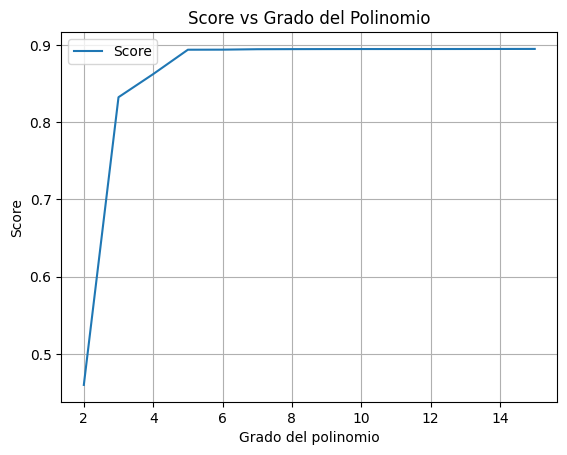

In [ ]:
#Graficamos los scores para analizar los resultados
plt.plot(degrees, scores, '-', label ='Score')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Score vs Grado del Polinomio')
plt.show()

## Evaluación de Modelos

Después de cierto grado el modelo parece que no tiene una mejora apreciable. Pero, ¿los modelos más complejos predicen mejor? Eso solo podemos saberlo con datos diferentes a los usados para entrenar el modelo

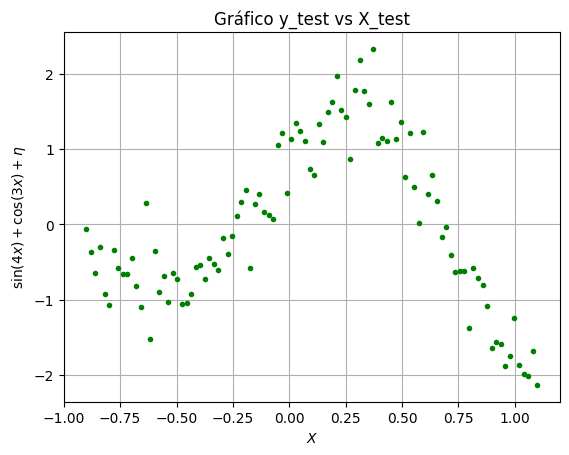

In [ ]:
#Vamos a generar otro conjunto de datos que el modelo aun no conoce
X_test= np.linspace(-0.9, 1.1, 100)

ruido= np.random.normal(0, 0.333,100)

y_test = np.sin(4*X_test) + np.cos(3*X_test) + ruido

#Graficamos los datos de prueba
plt.plot(X_test,y_test, '.g')
plt.grid()
plt.title('Gráfico y_test vs X_test')
plt.xlabel('$X$')
plt.ylabel('$\sin(4x)+\cos(3x)+\eta$')
plt.show()

In [ ]:
#Vamos a implementar el pipeline

#Cargamosla libreria para la creación de pipelines

from sklearn.pipeline import Pipeline

#Instanciamos la secuncia de procesos que queremos aplicar a los datos
#Para el pipeline se crea una lista de tuplas, cada tupla está conformada por la pareja ('variable',función)

pipe= Pipeline([('poly', PolynomialFeatures()),
                ('model', LinearRegression(fit_intercept=True))])

#Creamos un vector con todos los grados del polinomio que queremos probar
degrees = range(2,16)

#Vamos a crear una lista vacia para almacenar los score queresulten de evaluar las regeresiones polinomiales con cada uno de los grados
scores_train = []
scores_test = []

#Implementamos el ciclo que recorra TODOS los grados que queremos probar
for degree in degrees:
    #Ajustamos el grado de polinomios
    scores_train.append(pipe.set_params(poly__degree = degree).fit(X,y).score(X,y))
    scores_test.append(pipe.score(X_test.reshape(-1,1), y_test))

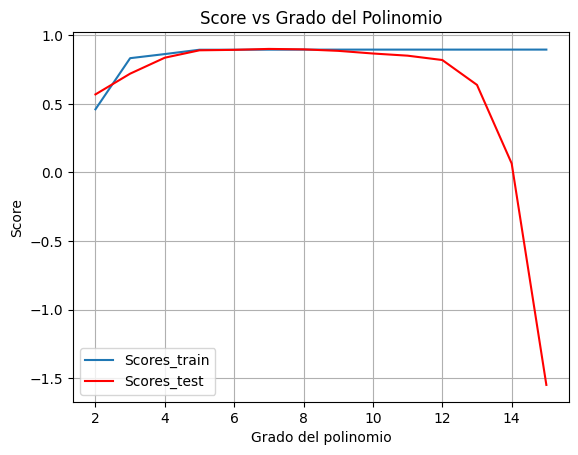

In [ ]:
#Graficamos los scores para analizar los resultados
plt.plot(degrees, scores_train, '-', label ='Scores_train')
plt.plot(degrees, scores_test, '-r', label ='Scores_test')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('Grado del polinomio')
plt.ylabel('Score')
plt.title('Score vs Grado del Polinomio')
plt.show()

## Regresión Multiple

En la regeresión multiple tenemos a diferentes características regresoras, y la ecuación tendría la forma:

$$y = w_0 + w_1x[1] + w_2x[2]+ \ldots w_Dx[D]
$$

In [ ]:
#Para nuestro ejemplo haremos la predicción del precio de un inmueble a partir de diversas características

#Cargamos los datos
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Real estate.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#Revisamos información estadística básica para observar la calidad de los datos
data.describe()

#De lo que se puede observar no hay datos nulos ni datos atípicos y todas las características son de naturaleza cuantitativa

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#Separamos el vector de datos a predecir (y)
y = data['Y house price of unit area'].copy()

#Revisamos el tamaño
y.shape

(414,)

In [ ]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#Separamos los datos de las variable predictoras (X)
#Creamos una lista con las variables que no nos sirven

cols_to_drop = ['No','X1 transaction date','Y house price of unit area']

#Creamos un dataframe con las variables predictoras
X =data.drop(cols_to_drop, axis = 1).copy()

#Revisamos el tamaño de X
X.shape

(414, 5)

In [ ]:
#Con fines de hacer la evaluación del modelo, haremos validación cruzada o cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(LinearRegression(fit_intercept= True),
                        X, y, cv=5, scoring= 'r2')

In [ ]:
score.mean()

0.5766950593066399

In [ ]:
score_RMS = cross_val_score(LinearRegression(fit_intercept= True),
                        X, y, cv=5, scoring= 'neg_mean_squared_error')

In [ ]:
-score_RMS.mean()

79.94377773067188